<a href="https://colab.research.google.com/github/prem-08/FindDefault/blob/main/Credit_card_fraud_detection_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Detection

## Problem statement:-

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however , poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and creditibility, this is a concerning issue to both banks and customers alike.

A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.

The aim of the project is to predict fraudulent credit card transactions using machine learning models. This is crucial from the bank’s as well as customer’s perspective.

## Data Understanding:

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [3]:
# Importing Required Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, f1_score

# For Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load Data
data = pd.read_csv("creditcard.csv")

In [5]:
# Read Data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


#### Check the structure of data

In [6]:
data.shape

(11683, 31)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11683 entries, 0 to 11682
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11683 non-null  int64  
 1   V1      11683 non-null  float64
 2   V2      11683 non-null  float64
 3   V3      11683 non-null  float64
 4   V4      11683 non-null  float64
 5   V5      11683 non-null  float64
 6   V6      11683 non-null  float64
 7   V7      11683 non-null  float64
 8   V8      11682 non-null  float64
 9   V9      11682 non-null  float64
 10  V10     11682 non-null  float64
 11  V11     11682 non-null  float64
 12  V12     11682 non-null  float64
 13  V13     11682 non-null  float64
 14  V14     11682 non-null  float64
 15  V15     11682 non-null  float64
 16  V16     11682 non-null  float64
 17  V17     11682 non-null  float64
 18  V18     11682 non-null  float64
 19  V19     11682 non-null  float64
 20  V20     11682 non-null  float64
 21  V21     11682 non-null  float64
 22

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11682.000000,11682.000000,...,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000
mean,7719.909783,-0.218930,0.274366,0.897415,0.279525,-0.080074,0.140209,-0.112851,-0.051813,0.894175,...,-0.060863,-0.155319,-0.034390,0.017484,0.101885,0.070011,0.007466,0.000765,62.744623,0.004194
std,5979.605669,1.562304,1.305756,1.273424,1.467618,1.185154,1.305368,1.129205,1.238005,1.182044,...,0.903168,0.624101,0.508133,0.592007,0.429794,0.560325,0.406579,0.262175,179.692760,0.064632
min,0.000000,-27.670569,-34.607649,-21.405836,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.555808,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2468.500000,-0.986679,-0.258310,0.416652,-0.616876,-0.682463,-0.622072,-0.584757,-0.186380,0.183126,...,-0.268870,-0.545219,-0.172766,-0.332772,-0.146471,-0.347419,-0.080530,-0.015509,5.000000,0.000000
50%,6329.000000,-0.346841,0.261619,0.949690,0.213597,-0.181072,-0.148172,-0.090324,0.011643,0.880564,...,-0.130308,-0.129040,-0.044523,0.073057,0.139838,0.008005,-0.003818,0.015363,15.950000,0.000000
75%,11927.000000,1.159482,0.887528,1.616155,1.152661,0.347763,0.508783,0.438043,0.266868,1.570395,...,0.022916,0.234891,0.076603,0.402492,0.375979,0.417116,0.108253,0.073880,50.000000,0.000000
max,19929.000000,1.960497,9.067613,4.101716,11.927512,34.099309,21.393069,34.303177,5.499963,10.392889,...,22.599543,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


# Exploratory Data Analysis

In [9]:
classes = data['Class'].value_counts(normalize=True)*100
classes

,proportion
Class,
0.0,99.580551
1.0,0.419449


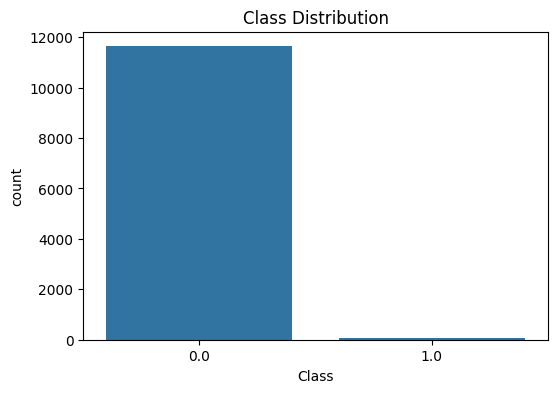

In [10]:
#Visualize the distribution of 'Class'
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title("Class Distribution")
plt.show()

## Handling missing values

In [11]:
# Check for missing values
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,1
V9,1


We can see that there is no missing values in any of the columns. Hence, there is no problem with null values in the entire dataset.

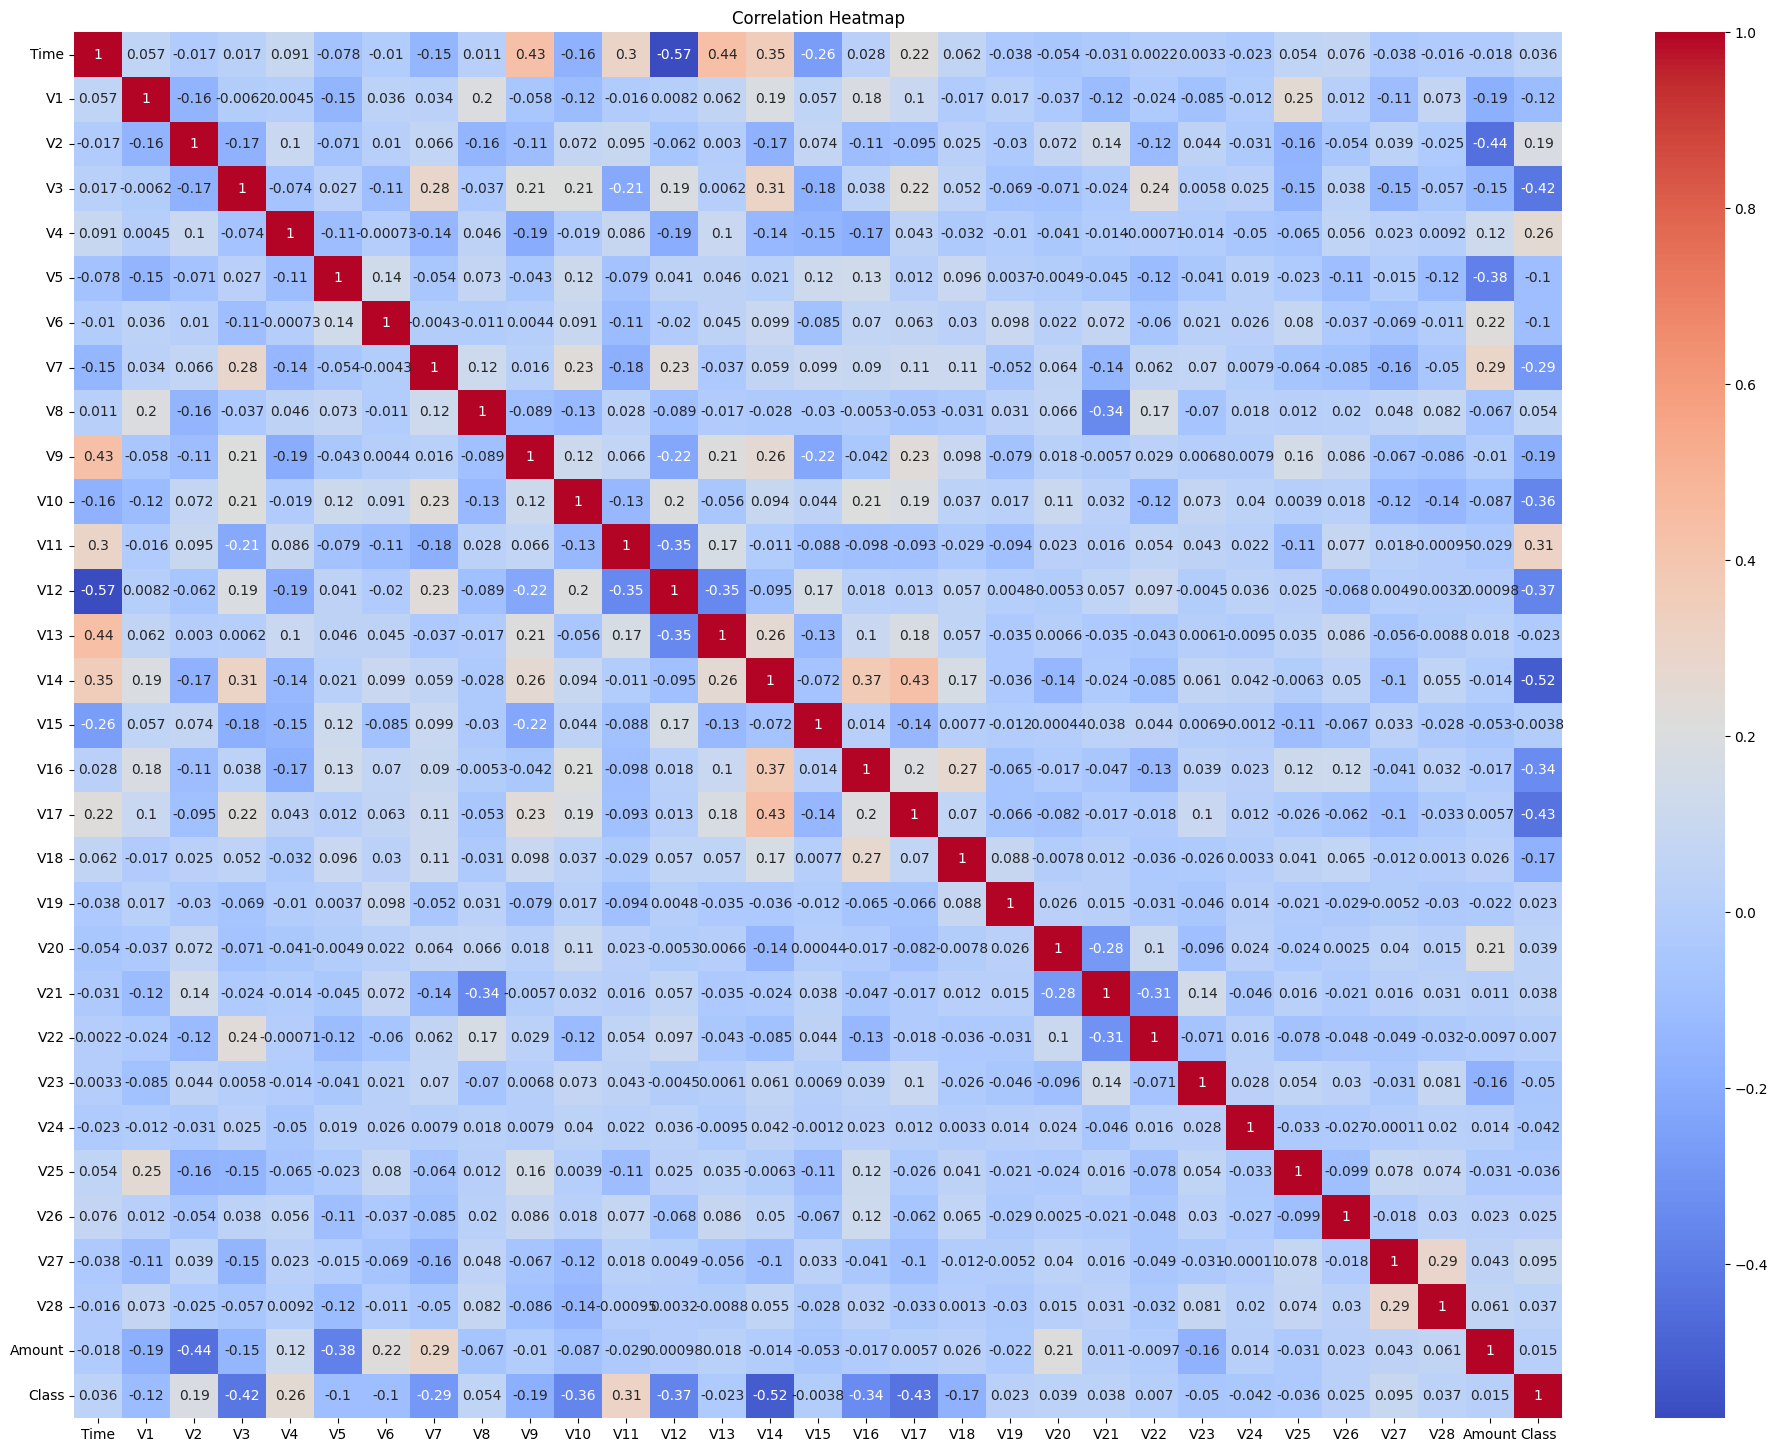

In [12]:
# Checking the correlation
plt.figure(figsize=(24,18))
sns.heatmap(data.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [13]:
# Convert 'Time' into hour of the day (assuming 'Time' is in seconds)
data['Hour'] = data['Time'] // 3600 % 24

# Drop original 'Time' column as it is not useful for our analysis
data = data.drop(columns=['Time'])

In [14]:
# Check the data
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,0


In [15]:
data.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
11678,1.208802,-0.401943,0.901086,-0.697416,-1.014073,-0.281932,-0.828187,0.108108,3.018142,-1.257041,...,-0.007707,-0.075264,-0.065906,0.454008,-0.719787,0.054139,0.015084,11.85,0.0,5
11679,-1.723814,1.389327,1.411353,-0.716019,-1.561864,1.505156,-2.024937,-5.393713,2.156363,-0.640814,...,-1.997550,-0.202928,-0.040939,1.221328,1.155446,0.334758,0.104672,155.38,0.0,5
11680,1.192037,-0.357840,1.002156,-0.558666,-1.017703,-0.321732,-0.780201,0.062111,3.206257,-1.477684,...,0.082080,0.007441,0.018529,0.378177,-0.693956,0.077499,0.025269,8.35,0.0,5
11681,-7.773912,4.249596,-5.985636,1.450199,-4.709726,-1.302327,-2.807678,4.890516,0.807323,0.576220,...,-0.188352,-0.302390,0.299249,-0.185131,-0.445921,0.143783,-0.061396,89.99,0.0,5
11682,1.024814,-1.179948,1.702954,-0.833752,-1.598620,1.270610,-1.786000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [16]:
# Standardize 'Amount' and 'Hour'
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['Hour'] = scaler.fit_transform(data['Hour'].values.reshape(-1,1))


In [17]:
# Separate the features and target variable
X = data.drop(columns='Class')
y = data['Class']

In [18]:
# Check the datas
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.483487,-1.038859
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.334222,-1.038859
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.758162,-1.038859
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.338121,-1.038859
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.040323,-1.038859


In [19]:
y.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


### Balancing the data using SMOTE

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
# Using SMOTE to handle class imbalance
smote = SMOTE(random_state=4)
# Drop rows with NaN in the target variable 'y'
# Before: X_sm, y_sm = smote.fit_resample(X, y)
y_not_nan_index = y[~pd.isnull(y)].index  # Get indices where 'y' is not NaN
X_not_nan = X.loc[y_not_nan_index]  # Filter 'X' using these indices
y_not_nan = y.loc[y_not_nan_index]  # Filter 'y' using these indices
X_sm, y_sm = smote.fit_resample(X_not_nan, y_not_nan)  # Apply SMOTE on filtered data

In [22]:
# Verify the new balance
print(y_sm.value_counts())

Class
0.0    11633
1.0    11633
Name: count, dtype: int64


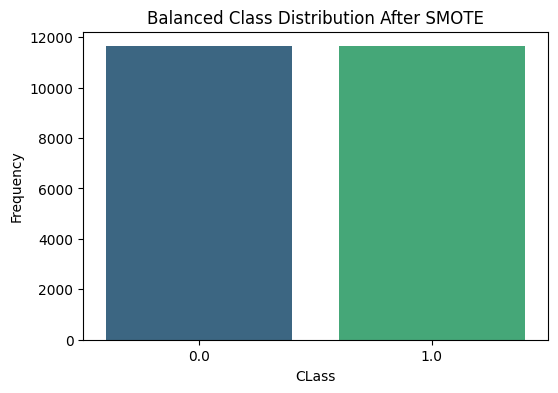

In [23]:
# PLotting the balance class distribution after SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_sm, palette="viridis")
plt.title("Balanced Class Distribution After SMOTE")
plt.xlabel("CLass")
plt.ylabel("Frequency")
plt.show()

## Train/Test Split

In [24]:
# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

## Model Selection and Training

### Logistic Regression

In [25]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)
y_pred_prob_log = log_reg.predict_proba(X_test)[:, 1]

In [26]:
# Evaluation Metrics
log_accuracy = accuracy_score(y_test, y_pred_log)
log_roc_auc = roc_auc_score(y_test, y_pred_prob_log)
log_f1 = f1_score(y_test, y_pred_log)
log_conf_matrix = confusion_matrix(y_test, y_pred_log)
log_class_report = classification_report(y_test, y_pred_log)

In [27]:
# Results
print("Logistic Regression: ")
print(f"Accuracy: {log_accuracy}")
print(f"ROC AUC Score: {log_roc_auc}")
print(f"F1 Score: {log_f1}")
print(f"Confusion Matrix: \n{log_conf_matrix}")
print(f"Classification Report: \n{log_class_report}")

Logistic Regression: 
Accuracy: 0.9959174903308982
ROC AUC Score: 0.9996069938110759
F1 Score: 0.9959060547295842
Confusion Matrix: 
[[2324   19]
 [   0 2311]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2343
         1.0       0.99      1.00      1.00      2311

    accuracy                           1.00      4654
   macro avg       1.00      1.00      1.00      4654
weighted avg       1.00      1.00      1.00      4654



### Random Forest

In [28]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

In [29]:
# Evaluation Metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_prob_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_class_report = classification_report(y_test, y_pred_rf)

In [30]:
# Results
print("Random Forest: ")
print(f"Accuracy: {rf_accuracy}")
print(f"ROC AUC Score: {rf_roc_auc}")
print(f"F1 Score: {rf_f1}")
print(f"Confusion Matrix: \n{rf_conf_matrix}")
print(f"Classification Report: \n{rf_class_report}")

Random Forest: 
Accuracy: 1.0
ROC AUC Score: 1.0
F1 Score: 1.0
Confusion Matrix: 
[[2343    0]
 [   0 2311]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2343
         1.0       1.00      1.00      1.00      2311

    accuracy                           1.00      4654
   macro avg       1.00      1.00      1.00      4654
weighted avg       1.00      1.00      1.00      4654



### XGBoost Classifier

In [31]:
#XGBoost Classifier
xgb = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

In [32]:
# Evaluation Metrics
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)
xgb_conf_matrix = confusion_matrix(y_test, y_pred_xgb)
xgb_class_report = classification_report(y_test, y_pred_xgb)

In [33]:
# Results
print("XGBoost:")
print(f"Accuracy: {xgb_accuracy}")
print(f"ROC AUC Score: {xgb_roc_auc}")
print(f"F1 Score: {xgb_f1}")
print(f"Confusion Matrix: \n{xgb_conf_matrix}")
print(f"Classification Report: \n{xgb_class_report}")

XGBoost:
Accuracy: 0.9997851310700473
ROC AUC Score: 0.9997865983781477
F1 Score: 0.99978369024443
Confusion Matrix: 
[[2342    1]
 [   0 2311]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2343
         1.0       1.00      1.00      1.00      2311

    accuracy                           1.00      4654
   macro avg       1.00      1.00      1.00      4654
weighted avg       1.00      1.00      1.00      4654



## Hyperparameter Tuning

### Logistic Regression Hyperparameter Tuning

In [34]:
# Hyperparameter tuning for Logistic Regression
param_grid_log = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

grid_log = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_log, cv=5)
grid_log.fit(X_train, y_train)

# Best parameters for Logistic Regression
print("Best Params for Logistic Regression:", grid_log.best_params_)

Best Params for Logistic Regression: {'C': 0.01, 'solver': 'saga'}


### Random Forest Hyperparameter Tuning

In [35]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

# Best parameters for Random Forest
print("Best Params for Random Forest:", grid_rf.best_params_)

Best Params for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}


### XGBoost Hyperparameter Tuning

In [38]:
# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_xgb = GridSearchCV(XGBClassifier(random_state=42, eva_metric='logloss', use_label_encoder=False), param_grid_xgb, cv=5)
grid_xgb.fit(X_train, y_train)

# Best parameters for XGBoost
print("Best Params for XGBoost:", grid_xgb.best_params_)

Best Params for XGBoost: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 500}


## Model Evaluation

In [39]:
# Evaluate the best model on test data
best_log_reg = grid_log.best_estimator_
best_rf = grid_rf.best_estimator_
best_xgb = grid_xgb.best_estimator_

In [40]:
# Logistic Regression Evaluation
y_pred_best_log = best_log_reg.predict(X_test)
y_pred_best_log_prob = best_log_reg.predict_proba(X_test)[:, 1]
log_roc_auc_best = roc_auc_score(y_test, y_pred_best_log_prob)
log_f1_best = f1_score(y_test, y_pred_best_log)
print(f"Tuned Logistic Regression ROC AUC Score: {log_roc_auc_best}")
print(f"Tuned Logistic Regression F1 Score: {log_f1_best}")

Tuned Logistic Regression ROC AUC Score: 0.9998136544903081
Tuned Logistic Regression F1 Score: 0.9969801553062986


In [41]:
# Random Forest Evaluation
y_pred_best_rf = best_rf.predict(X_test)
y_pred_best_rf_prob = best_rf.predict_proba(X_test)[:, 1]
rf_roc_auc_best = roc_auc_score(y_test, y_pred_best_rf_prob)
rf_f1_best = f1_score(y_test, y_pred_best_rf)
print(f"Tuned Random Forest ROC AUC Score: {rf_roc_auc_best}")
print(f"Tuned Random Forest F1 Score: {rf_f1_best}")

Tuned Random Forest ROC AUC Score: 1.0
Tuned Random Forest F1 Score: 1.0


In [42]:
# XGBoost Evaluation
y_pred_best_xgb = best_xgb.predict(X_test)
y_pred_best_xgb_prob = best_xgb.predict_proba(X_test)[:, 1]
xgb_roc_auc_best = roc_auc_score(y_test, y_pred_best_xgb_prob)
xgb_f1_best = f1_score(y_test, y_pred_best_xgb)
print(f"Tuned XGBoost ROC AUC Score: {xgb_roc_auc_best}")
print(f"Tuned XGBoost F1 Score: {xgb_f1_best}")

Tuned XGBoost ROC AUC Score: 1.0
Tuned XGBoost F1 Score: 1.0


# **Conclusion**

In the FindDefault (Prediction of Credit Card Fraud) project, we utilized three classification models -- Logistic
Regression, Random Forest, and XGBoost -- to predict fraudulent transactions using a dataset of credit card
transactions.

XGBoost, with its superior handling of imbalanced data and ability to capture complex patterns, proved to be the most effective model for this task, making it the best choice for deploying in a real-world fraud detection system.